### 1. 숫자를 값으로 가지는 임의의 3x3 리스트 정의

In [2]:
ndlist1 = [[1,2,3],[4,5,6],[7,8,9]]
ndlist2 = [[-4,-3,-2],[-1,0,1],[2,3,4]]

- 리스트의 산술 연산자 사용 (리스트를 리스트에 append하는 목적으로 사용 )

In [23]:
ndlist1 * 3

[[1, 2, 3],
 [4, 5, 6],
 [7, 8, 9],
 [1, 2, 3],
 [4, 5, 6],
 [7, 8, 9],
 [1, 2, 3],
 [4, 5, 6],
 [7, 8, 9]]

In [26]:
ndlist1 + ndlist2

[[1, 2, 3], [4, 5, 6], [7, 8, 9], [-4, -3, -2], [-1, 0, 1], [2, 3, 4]]

### 2. list 값을 시각화 하기
- 리스트를 시각화하여 데이터의 구조를 시각적으로 확인할 수 있습니다. 여기서 시각화는 리스트의 값을 지질도처럼 표현합니다.

In [3]:
import functions as fs

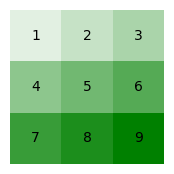

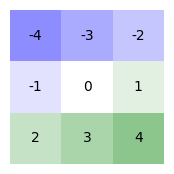

In [4]:
fs.visualize_ndlist(ndlist1)
fs.visualize_ndlist(ndlist2)

### 문제 #1
- 2차원 리스트의 각 항목에 특정 숫자를 곱하는 함수를 정의해봅니다. 이 과정은 리스트의 모든 값에 동일한 숫자를 곱하는 것을 의미합니다.
- 예를 들어, `[[1,2,3],[4,5,6],[7,8,9]]` 에 2를 곱하면 `[[2,4,6],[8,10,12],[14,16,18]]`이 됩니다.

In [5]:
# 스칼라 곱 함수 정의
"""
2차원 list의 각 item에 특정 숫자(float)를 곱하는 함수를 만들어라
예) [[1,2,3],[4,5,6],[7,8,9]] 에 2 을 곱하면 => [[2,4,6],[8,10,12],[14,16,18]]
"""
def list_mul_scalar(twod: list, scalar: float)->list:
    ...

### 문제 #2
- 2차원 리스트를 1차원 리스트로 변환하는 함수를 정의합니다. 이 작업은 행렬을 일렬로 펼쳐서 하나의 리스트로 만드는 과정입니다.
- 예를 들어, `[[1,2,3],[4,5,6],[7,8,9]]`는 `[1,2,3,4,5,6,7,8,9]`로 변환됩니다.

In [6]:
# 평탄화 함수 정의
"""
2차원 list를 1차원(벡터) list로 변환하는 함수를 만들어라
예) [[1,2,3],[4,5,6],[7,8,9]] => [1,2,3,4,5,6,7,8,9]
"""
def two2one(twod: list)->list:
    ...

### 3. 3X3 list 테스트 데이터 정의
- 다양한 테스트 데이터를 준비해봅니다. 이는 이후의 연산 테스트에 사용될 것입니다.

In [7]:
matrix_a = [[1,2,3], [4,5,6], [7,8,9]]
matrix_b = [[9,8,7], [6,5,4], [3,2,1]]
matrix_c = [[5,5,5], [5,5,5], [5,5,5]]
matrix_d = [[1,1,1], [1,1,1], [1,1,1]]
matrix_e = [[0,1,2], [3,4,5], [6,7,8]]
matrix_f = [[9,-4,1], [0,-1,2], [-3,5,-3]]
matrix_g = [[-1,-2,-3], [-4,-5,-6], [-7,-8,-9]]

- 데이터들을 시각화하여 구조를 확인해봅니다.

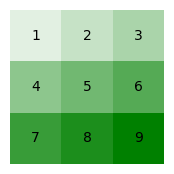

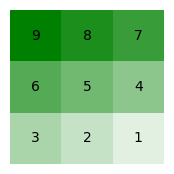

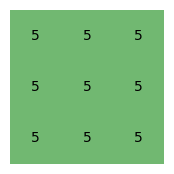

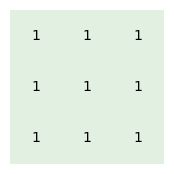

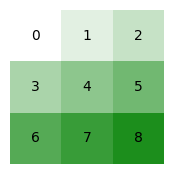

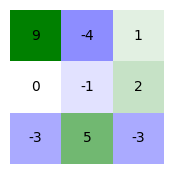

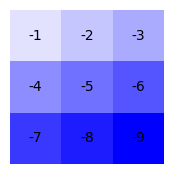

In [8]:
fs.visualize_ndlist(matrix_a)
fs.visualize_ndlist(matrix_b)
fs.visualize_ndlist(matrix_c)
fs.visualize_ndlist(matrix_d)
fs.visualize_ndlist(matrix_e)
fs.visualize_ndlist(matrix_f)
fs.visualize_ndlist(matrix_g)

### 4. 2차원 list를 스칼라 곱을 한 후 1차원으로 변환하기
- 리스트에 스칼라 곱을 한 후, 그 결과를 1차원으로 변환하는 과정을 보여줍니다.
- 여기서 스칼라 곱은 리스트의 최대값으로 나누어 값들을 0에서 1 사이로 정규화(최소-최대 정규화(Min-Max Normalization))하는 데 사용됩니다.

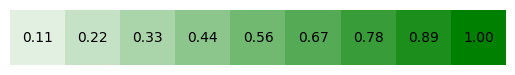

[0.1111111111111111, 0.2222222222222222, 0.3333333333333333, 0.4444444444444444, 0.5555555555555556, 0.6666666666666666, 0.7777777777777777, 0.8888888888888888, 1.0]


In [9]:
# 스칼라 곱하기 (최대값으로 나누어 0~1 사이 값으로 변환)
matrix_a_mul_scalar = fs.list_mul_scalar(matrix_a, 1/9)
# 평탄화
matrix_a_2flat = fs.two2one(matrix_a_mul_scalar)

fs.visualize_ndlist(matrix_a_2flat, vmin=-1, vmax=1)
print(matrix_a_2flat)

### 5. 2차원 list의 평탄화, 스칼라 곱에 특화된 컨테이너 타입의 Class 정의
- 이제 이 과정을 클래스 형태로 구조화하여, 반복적인 작업을 보다 효율적으로 처리할 수 있도록 합니다.

In [10]:
class SamSam:
    def __init__(self, twod: list = None):
        self.twod = twod
    
    def list_mul_scalar(self, scalar: float) -> 'SamSam':
        # 2차원 리스트의 각 요소에 스칼라 값을 곱한 결과를 반환
        new_twod = fs.list_mul_scalar(self.twod, scalar)
        return SamSam(new_twod)
    
    def two2one(self) -> list:
        return fs.two2one(self.twod)

- 이 클래스를 사용해서 `4`장의 함수로 구현한 경우와 동일한 결과를 얻습니다.

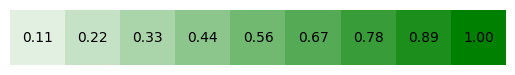

[0.1111111111111111, 0.2222222222222222, 0.3333333333333333, 0.4444444444444444, 0.5555555555555556, 0.6666666666666666, 0.7777777777777777, 0.8888888888888888, 1.0]


In [11]:
matrix_a_2flat = SamSam(matrix_a).list_mul_scalar(1/9).two2one()

fs.visualize_ndlist(matrix_a_2flat, vmin=-1, vmax=1)
print(matrix_a_2flat)

- `SamSam` Class 객체를 출력해 봅니다. 객체에 할당된 메모리 주소정보가 출력됩니다.

In [12]:
SamSam(matrix_a)

In [20]:
print(SamSam(matrix_a))

### 6. 스칼라 곱을 연산자 `*`기호로 사용할 수 있도록 Class 재정의
- 연산자 오버로딩을 통해, 스칼라 곱을 더 직관적으로 처리할 수 있도록 `*` 연산자를 사용할 수 있게 만듭니다.
- 매직메소드 `__mul__`, `__rmul__` 정의

In [13]:
class SamSamMagic:
    
    def __init__(self, twod: list = None):
        self.twod = twod
    
    def __mul__(self, scalar: float) -> 'SamSamMagic':
        # 2차원 리스트의 각 요소에 스칼라 값을 곱한 결과를 반환
        new_twod = fs.list_mul_scalar(self.twod, scalar)
        return SamSamMagic(new_twod)
    
    def __rmul__(self, scalar: float) -> 'SamSamMagic':
        # 스칼라 값이 앞에 올 때의 곱셈 연산을 처리
        return self.__mul__(scalar)
    
    def two2one(self) -> list:
        return fs.two2one(self.twod)
    
    def __str__(self) -> str:
        # 객체의 비공식적이고 사람이 읽기 쉬운 문자열 표현
        return f"{self.twod}"
    
    def __repr__(self) -> str:
        # 객체의 공식적인 문자열 표현 (디버깅을 위해 사용)
        return f"SamSamMagic({self.twod})"

- 이 클래스의 `*`연산자를 사용해도 `SamSam` 클래스의 명시적인 메소드를 사용한 경우와 동일한 결과를 얻습니다.

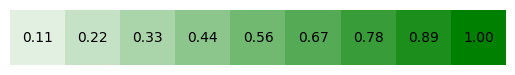

[0.1111111111111111, 0.2222222222222222, 0.3333333333333333, 0.4444444444444444, 0.5555555555555556, 0.6666666666666666, 0.7777777777777777, 0.8888888888888888, 1.0]


In [14]:
matrix_a_2flat_mul_scalar = ( SamSamMagic(matrix_a) * (1/9) ).two2one()

fs.visualize_ndlist(matrix_a_2flat, vmin=-1, vmax=1)
print(matrix_a_2flat_mul_scalar)

- `SamSamMagic` 클래스 객체를 출력해봅니다. 매직메소드 `__str__` 또는 `__repr__` 가 실행됩니다.

In [21]:
SamSamMagic(matrix_a)

SamSamMagic([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [22]:
print(SamSamMagic(matrix_a))

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]


- 전체 3X3 리스트 테스트 데이터들을 각각 스칼라 곱(최소-최대 정규화) 및 평탄화 합니다.

In [15]:
matrix_b_2flat_mul_scalar = ( SamSamMagic(matrix_b) * (1/9) ).two2one()
matrix_c_2flat_mul_scalar = ( SamSamMagic(matrix_c) * (1/9) ).two2one()
matrix_d_2flat_mul_scalar = ( SamSamMagic(matrix_d) * (1/9) ).two2one()
matrix_e_2flat_mul_scalar = ( SamSamMagic(matrix_e) * (1/9) ).two2one()
matrix_f_2flat_mul_scalar = ( SamSamMagic(matrix_f) * (1/9) ).two2one()
matrix_g_2flat_mul_scalar = ( SamSamMagic(matrix_g) * (1/9) ).two2one()

- 스칼라 곱 + 평탄화된 정보를 시각화 합니다.

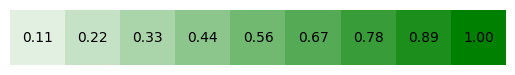

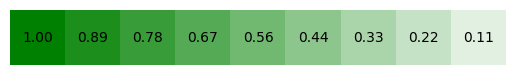

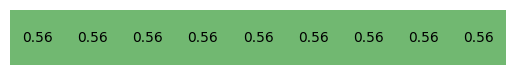

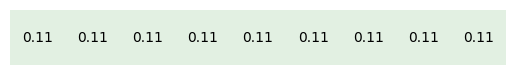

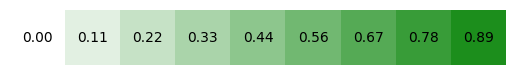

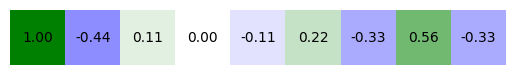

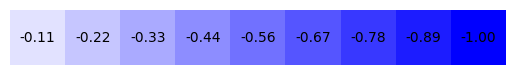

In [16]:
fs.visualize_ndlist(matrix_a_2flat_mul_scalar, vmin=-1, vmax=1)
fs.visualize_ndlist(matrix_b_2flat_mul_scalar, vmin=-1, vmax=1)
fs.visualize_ndlist(matrix_c_2flat_mul_scalar, vmin=-1, vmax=1)
fs.visualize_ndlist(matrix_d_2flat_mul_scalar, vmin=-1, vmax=1)
fs.visualize_ndlist(matrix_e_2flat_mul_scalar, vmin=-1, vmax=1)
fs.visualize_ndlist(matrix_f_2flat_mul_scalar, vmin=-1, vmax=1)
fs.visualize_ndlist(matrix_g_2flat_mul_scalar, vmin=-1, vmax=1)

### 7. 두 1차원 list간 유사도를 구하는 함수 정의
- 두 1차원 리스트 간의 유사도를 구하는 함수를 정의합니다. 여기서는 코사인 유사도를 사용하여 유사성을 계산합니다.

In [17]:
# 코사인 유사도 함수 정의
# prompt : 두 1차원 list 간의 유사도를 구하는 함수 만들어줘
import math

def calc_similarity(list_a: list, list_b: list) -> float:
    # 내적 (dot product) 계산
    dot_product = sum(a * b for a, b in zip(list_a, list_b))
    
    # 각 벡터의 크기 (magnitude) 계산
    magnitude_a = math.sqrt(sum(a * a for a in list_a))
    magnitude_b = math.sqrt(sum(b * b for b in list_b))
    
    # 두 벡터의 크기가 0일 경우 유사도를 계산할 수 없음
    if magnitude_a == 0 or magnitude_b == 0:
        return 0.0
    
    # 코사인 유사도 계산
    return dot_product / (magnitude_a * magnitude_b)

### 8. 3X3 리스트 테스트 데이터간에 유사도 측정
- 2개의 데이터간의 유사도를 측정합니다.
- 유사도가 높을수록 결과값이 `1`에 가깝고 낮을수록 `-1`에 가깝습니다.
- 결과값 `0`은 서로 상관없음(두벡터간 직교)을 의미합니다.

In [18]:
a_vs_a = calc_similarity(matrix_a_2flat_mul_scalar, matrix_a_2flat_mul_scalar)
a_vs_b = calc_similarity(matrix_a_2flat_mul_scalar, matrix_b_2flat_mul_scalar)
a_vs_c = calc_similarity(matrix_a_2flat_mul_scalar, matrix_c_2flat_mul_scalar)
a_vs_e = calc_similarity(matrix_a_2flat_mul_scalar, matrix_e_2flat_mul_scalar)
a_vs_f = calc_similarity(matrix_a_2flat_mul_scalar, matrix_f_2flat_mul_scalar)
c_vs_d = calc_similarity(matrix_a_2flat_mul_scalar, matrix_e_2flat_mul_scalar)
a_vs_g = calc_similarity(matrix_a_2flat_mul_scalar, matrix_g_2flat_mul_scalar)

- 유사도 계산결과를 시작화합니다.

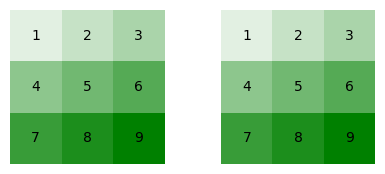

a_vs_a : 0.9999999999999999


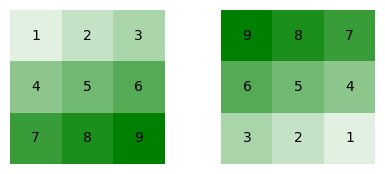

a_vs_b : 0.5789473684210524


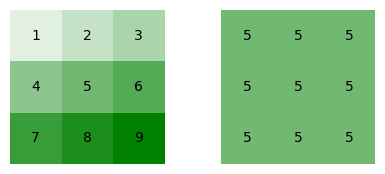

a_vs_c : 0.8885233166386385


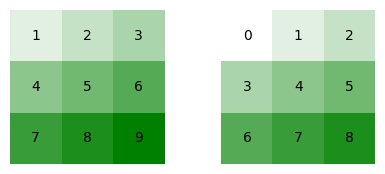

a_vs_e : 0.995345203586879


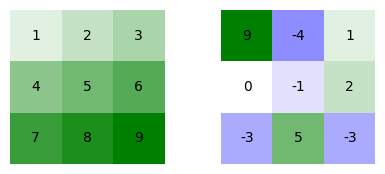

a_vs_f : 0.014706942580212892


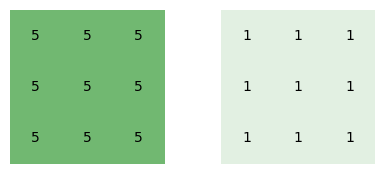

c_vs_d : 0.995345203586879


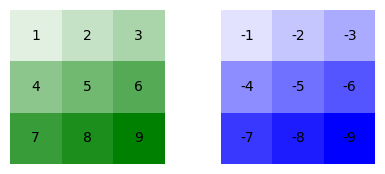

a_vs_g : -0.9999999999999999


In [19]:
fs.visualize_ndlists_side_by_side(matrix_a, matrix_a)
print(f"a_vs_a : {a_vs_a}")

fs.visualize_ndlists_side_by_side(matrix_a, matrix_b)
print(f"a_vs_b : {a_vs_b}")

fs.visualize_ndlists_side_by_side(matrix_a, matrix_c)
print(f"a_vs_c : {a_vs_c}")

fs.visualize_ndlists_side_by_side(matrix_a, matrix_e)
print(f"a_vs_e : {a_vs_e}")

fs.visualize_ndlists_side_by_side(matrix_a, matrix_f)
print(f"a_vs_f : {a_vs_f}")

fs.visualize_ndlists_side_by_side(matrix_c, matrix_d)
print(f"c_vs_d : {c_vs_d}")

fs.visualize_ndlists_side_by_side(matrix_a, matrix_g)
print(f"a_vs_g : {a_vs_g}")